In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
def noisy(noise_typ, image):
    if noise_typ == "s&p":
        row, col, ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, 
                                    int(num_salt)) for i in image.shape]
        out[coords] = 1
        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, 
                                    int(num_pepper)) for i in image.shape]
        out[coords] = 0
        return out    
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        return image + image * gauss

c:\users\ashwin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
c:\users\ashwin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


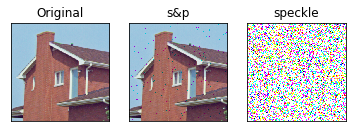

In [3]:
path = "D:\\Dataset\\"
imgpath1 =  path + "4.1.05.tiff"
img = cv2.imread(imgpath1, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
output = [img, noisy('s&p', img), noisy('speckle', img)]
titles = ['Original', 's&p', 'speckle' ]    
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()